In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [2]:
db = "/Users/gajulasupreethi/Desktop/Datasets/movies.sqlite"
con = sqlite3.connect(db)
cur = con.cursor()

In [3]:
#get all the data from the dataset
cur.execute("select * from movies")
movies = cur.fetchall()
movies = pd.DataFrame(movies, columns = ['id', 'original_title', 'budget', 'popularity',
                                         'release_date', 'revenue', 'title', 'vote_average',
                                         'vote_count', 'overview', 'tagline', 'uid',
                                         'director_id'])
movies.head()

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4773 non-null   int64  
 1   original_title  4773 non-null   object 
 2   budget          4773 non-null   int64  
 3   popularity      4773 non-null   int64  
 4   release_date    4773 non-null   object 
 5   revenue         4773 non-null   int64  
 6   title           4773 non-null   object 
 7   vote_average    4773 non-null   float64
 8   vote_count      4773 non-null   int64  
 9   overview        4770 non-null   object 
 10  tagline         3951 non-null   object 
 11  uid             4773 non-null   int64  
 12  director_id     4773 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 484.9+ KB


In [6]:
#getting the data from the director table
cur.execute("select*from directors")
directors = cur.fetchall()
#converting into dataframe
directors = pd.DataFrame(directors,columns = ['name', 'id', 'gender', 'uid', 'department'])
directors.head()

,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing
3,Christopher Nolan,4765,2,525,Directing
4,Andrew Stanton,4766,2,7,Directing


In [7]:
directors.info()
#total 2349 entries and there are no null values totally

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        2349 non-null   object
 1   id          2349 non-null   int64 
 2   gender      2349 non-null   int64 
 3   uid         2349 non-null   int64 
 4   department  2349 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.9+ KB


# Budget Analysis 

In [8]:
cur.execute("""select original_title,name,release_date,budget,revenue from movies 
            join directors on movies.director_id = directors.id order by budget desc""")
expenses = cur.fetchall()
expenses = pd.DataFrame(expenses,columns = ['original_title','director_name',
                                            'release_date','budget','revenue'])
expenses.head(10)


,original_title,director_name,release_date,budget,revenue
0,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,2011-05-14,380000000,1045713802
1,Pirates of the Caribbean: At World's End,Gore Verbinski,2007-05-19,300000000,961000000
2,Avengers: Age of Ultron,Joss Whedon,2015-04-22,280000000,1405403694
3,Superman Returns,Bryan Singer,2006-06-28,270000000,391081192
4,John Carter,Andrew Stanton,2012-03-07,260000000,284139100
5,Tangled,Byron Howard,2010-11-24,260000000,591794936
6,Spider-Man 3,Sam Raimi,2007-05-01,258000000,890871626
7,The Lone Ranger,Gore Verbinski,2013-07-03,255000000,89289910
8,The Dark Knight Rises,Christopher Nolan,2012-07-16,250000000,1084939099
9,Harry Potter and the Half-Blood Prince,David Yates,2009-07-07,250000000,933959197


# popularity analysis

In [9]:
cur.execute('''SELECT original_title, name, release_date, popularity, 
            revenue FROM movies JOIN directors ON movies.director_id = directors.id ORDER BY 
             popularity DESC''')
mostPopular = cur.fetchall()
mostPopular = pd.DataFrame(mostPopular, columns = ['original_title', 'director_name', 'release_date', 'popularity', 'revenue'])
mostPopular.head(10)

,original_title,director_name,release_date,popularity,revenue
0,Minions,Kyle Balda,2015-06-17,875,1156730962
1,Interstellar,Christopher Nolan,2014-11-05,724,675120017
2,Deadpool,Tim Miller,2016-02-09,514,783112979
3,Guardians of the Galaxy,James Gunn,2014-07-30,481,773328629
4,Mad Max: Fury Road,George Miller,2015-05-13,434,378858340
5,Jurassic World,Colin Trevorrow,2015-06-09,418,1513528810
6,Pirates of the Caribbean: The Curse of the Bla...,Gore Verbinski,2003-07-09,271,655011224
7,Dawn of the Planet of the Apes,Matt Reeves,2014-06-26,243,710644566
8,The Hunger Games: Mockingjay - Part 1,Francis Lawrence,2014-11-18,206,752100229
9,Big Hero 6,Chris Williams,2014-10-24,203,652105443


# profit analysis

In [10]:
cur.execute('SELECT original_title, name, release_date, revenue FROM movies JOIN directors ON movies.director_id = directors.id ORDER BY revenue DESC')
mostProfit = cur.fetchall()
mostProfit = pd.DataFrame(mostProfit, columns = ['original_title', 'director_name', 'release_date', 'revenue'])
mostProfit.head(10)

,original_title,director_name,release_date,revenue
0,Avatar,James Cameron,2009-12-10,2787965087
1,Titanic,James Cameron,1997-11-18,1845034188
2,The Avengers,Joss Whedon,2012-04-25,1519557910
3,Jurassic World,Colin Trevorrow,2015-06-09,1513528810
4,Furious 7,James Wan,2015-04-01,1506249360
5,Avengers: Age of Ultron,Joss Whedon,2015-04-22,1405403694
6,Frozen,Chris Buck,2013-11-27,1274219009
7,Iron Man 3,Shane Black,2013-04-18,1215439994
8,Minions,Kyle Balda,2015-06-17,1156730962
9,Captain America: Civil War,Anthony Russo,2016-04-27,1153304495


In [12]:
#lets see movies by only james cameron
cur.execute('''SELECT original_title,name, release_date, budget, revenue,
               popularity, vote_average FROM directors JOIN movies
               ON directors.id = movies.director_id WHERE name = "James Cameron" 
               ORDER BY revenue DESC''')
moviesByJamesCameron = cur.fetchall()
moviesByJamesCameron = pd.DataFrame(moviesByJamesCameron, columns = ['original_title', 'director','release_date', 'budget', 'revenue', 'popularity', 'vote_average'])
moviesByJamesCameron

,original_title,director,release_date,budget,revenue,popularity,vote_average
0,Avatar,James Cameron,2009-12-10,237000000,2787965087,150,7.2
1,Titanic,James Cameron,1997-11-18,200000000,1845034188,100,7.5
2,Terminator 2: Judgment Day,James Cameron,1991-07-01,100000000,520000000,101,7.7
3,True Lies,James Cameron,1994-07-14,115000000,378882411,38,6.8
4,Aliens,James Cameron,1986-07-18,18500000,183316455,67,7.7
5,The Abyss,James Cameron,1989-08-09,70000000,90000098,24,7.1
6,The Terminator,James Cameron,1984-10-26,6400000,78371200,74,7.3


# voting analysis

In [13]:
cur.execute('''SELECT original_title, name, release_date, vote_average, vote_count
            FROM movies JOIN directors
            ON movies.director_id = directors.id ORDER BY vote_average DESC''')
bestVote = cur.fetchall()
bestVote = pd.DataFrame(bestVote, columns = ['original_title', 'director_name', 'release_date',  'vote_average', 'vote_count'])
bestVote.head(10)

,original_title,director_name,release_date,vote_average,vote_count
0,Stiff Upper Lips,Gary Sinyor,1998-06-12,10.0,1
1,"Dancer, Texas Pop. 81",Tim McCanlies,1998-05-01,10.0,1
2,Sardaarji,Rohit Jugraj,2015-06-26,9.5,2
3,One Man's Hero,Lance Hool,1999-08-02,9.3,2
4,The Shawshank Redemption,Frank Darabont,1994-09-23,8.5,8205
5,There Goes My Baby,Floyd Mutrux,1994-09-02,8.5,2
6,The Prisoner of Zenda,John Cromwell,1937-09-03,8.4,11
7,The Godfather,Francis Ford Coppola,1972-03-14,8.4,5893
8,Fight Club,David Fincher,1999-10-15,8.3,9413
9,Schindler's List,Steven Spielberg,1993-11-29,8.3,4329


<Axes: >

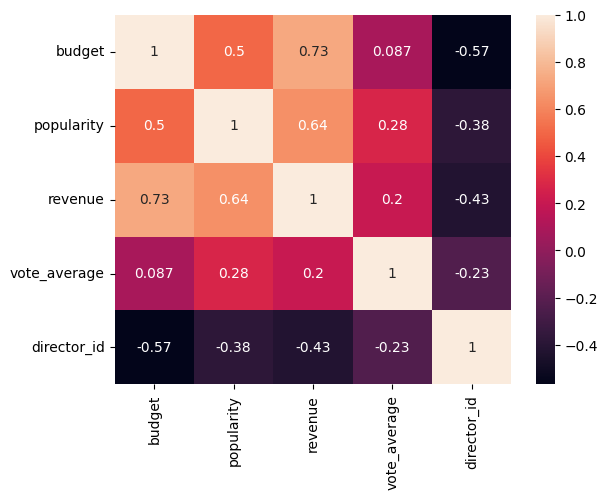

In [16]:
#correlation between different attributes(float type only works)
sns.heatmap(movies[['budget', 'popularity', 'revenue', 'vote_average', 'director_id']].corr(),
           annot = True)

In [17]:
#which director has got more profit
cur.execute('SELECT name, COUNT(original_title), SUM(revenue)FROM directors JOIN movies ON directors.id = movies.director_id GROUP BY name ORDER BY SUM(revenue) DESC')
mostProfitableDirector = cur.fetchall()
mostProfitableDirector = pd.DataFrame(mostProfitableDirector, columns = ['director_name', 'movies', 'revenue'])
mostProfitableDirector.head(10)

,director_name,movies,revenue
0,Steven Spielberg,27,9147393164
1,Peter Jackson,9,6498642820
2,James Cameron,7,5883569439
3,Michael Bay,12,5832524638
4,Christopher Nolan,8,4227483234
5,Chris Columbus,11,3725631503
6,Robert Zemeckis,13,3590622002
7,George Lucas,5,3339113893
8,Tim Burton,14,3337418241
9,Ridley Scott,16,3189557997


In [18]:
#to see which director has directed many movies
cur.execute('SELECT name, COUNT(original_title) FROM directors JOIN movies ON directors.id = movies.director_id GROUP BY name ORDER BY COUNT(original_title) DESC')
mostProductiveDirector = cur.fetchall()
mostProductiveDirector = pd.DataFrame(mostProductiveDirector, columns = ['director_name', 'movies'])
mostProductiveDirector.head(10)

,director_name,movies
0,Steven Spielberg,27
1,Woody Allen,21
2,Martin Scorsese,20
3,Clint Eastwood,20
4,Spike Lee,16
5,Robert Rodriguez,16
6,Ridley Scott,16
7,Steven Soderbergh,15
8,Renny Harlin,15
9,Tim Burton,14


In [19]:
#movies only by steven spielberg
cur.execute('SELECT original_title, release_date, budget, revenue, popularity, vote_average FROM directors JOIN movies ON directors.id = movies.director_id WHERE name = "Steven Spielberg" ORDER BY release_date DESC')
moviesByStevenSpielberg = cur.fetchall()
moviesByStevenSpielberg = pd.DataFrame(moviesByStevenSpielberg, columns = ['original_title', 'release_date', 'budget', 'revenue', 'popularity', 'vote_average'])
moviesByStevenSpielberg

,original_title,release_date,budget,revenue,popularity,vote_average
0,The BFG,2016-06-01,140000000,183345589,44,6.0
1,Bridge of Spies,2015-10-15,40000000,165478348,48,7.2
2,Lincoln,2012-11-09,65000000,275293450,36,6.7
3,War Horse,2011-12-25,66000000,177584879,29,7.0
4,The Adventures of Tintin,2011-10-25,130000000,371940071,89,6.7
5,Indiana Jones and the Kingdom of the Crystal S...,2008-05-21,185000000,786636033,75,5.7
6,Munich,2005-12-22,70000000,130358911,29,6.9
7,War of the Worlds,2005-06-28,132000000,591739379,48,6.2
8,The Terminal,2004-06-17,60000000,219417255,57,7.0
9,Catch Me If You Can,2002-12-25,52000000,352114312,73,7.7
